In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [459]:
# this csv file has an evaluation of Sno and r-r values
df = pd.read_csv("/home/mohit/Documents/respiratoryrate vs r-r values/2000-3000.csv")

In [460]:
df.head(1000)

,respiratoryrate,rrvalues
0,9.9777,0.670
1,9.9777,0.674
2,10.4287,0.679
3,14.5482,0.708
4,14.5482,0.728
...,...,...
995,15.0797,0.704
996,15.0797,0.707
997,15.0648,0.700
998,15.0462,0.717


In [461]:
df.describe()

,respiratoryrate,rrvalues
count,1000.000000,1000.000000
mean,12.829461,0.760341
std,1.534594,0.045397
min,8.903400,0.641000
25%,11.983450,0.732000
50%,13.149500,0.757000
75%,13.773775,0.782000
max,16.639500,0.917000


In [462]:
df.shape


(1000, 2)

In [463]:
cdf = df[['respiratoryrate','rrvalues']]
cdf.head(5)

,respiratoryrate,rrvalues
0,9.9777,0.670
1,9.9777,0.674
2,10.4287,0.679
3,14.5482,0.708
4,14.5482,0.728


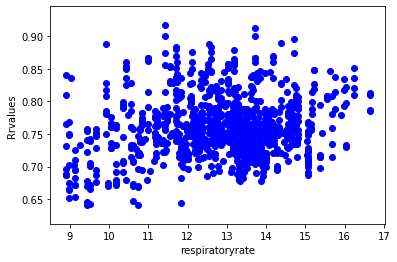

In [464]:
#graph of SNO vs r-r values

plt.scatter(cdf.respiratoryrate, cdf.rrvalues,color='blue')
plt.xlabel('respiratoryrate')
plt.ylabel('Rrvalues')
plt.show()

In [465]:
#splitting our data in 80-20 ratio for regression

In [466]:
#taking 20% test data 
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

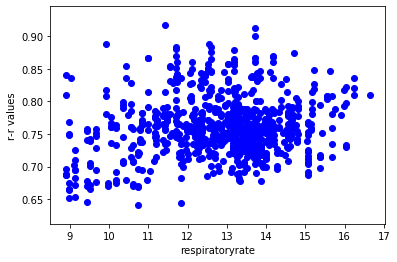

In [467]:
#plotting our training data of Sno vs r-r values
plt.scatter(train.respiratoryrate, train.rrvalues,  color='blue')
plt.xlabel("respiratoryrate")
plt.ylabel("r-r values")
plt.show()

In [468]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['respiratoryrate']])
train_y = np.asanyarray(train[['rrvalues']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.00426619]]
Intercept:  [0.70571517]


Text(0, 0.5, 'r-r values')

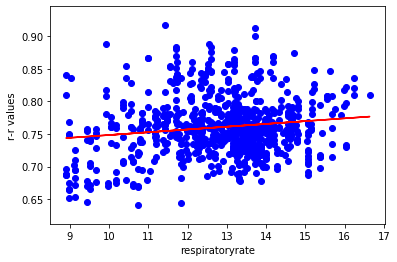

In [469]:
plt.scatter(train.respiratoryrate, train.rrvalues,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("respiratoryrate")
plt.ylabel("r-r values")

In [470]:
# checking accuracy of data by linear regression
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['respiratoryrate']])
test_y = np.asanyarray(test[['rrvalues']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: -44.87


In [471]:
#using polynomial regression

In [472]:
#generating a matrix of all polynomial combinations

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['respiratoryrate']])
train_y = np.asanyarray(train[['rrvalues']])

test_x = np.asanyarray(test[['respiratoryrate']])
test_y = np.asanyarray(test[['rrvalues']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[  1.        ,   9.9777    ,  99.55449729],
       [  1.        ,   9.9777    ,  99.55449729],
       [  1.        ,  10.4287    , 108.75778369],
       ...,
       [  1.        ,  15.0797    , 227.39735209],
       [  1.        ,  15.0797    , 227.39735209],
       [  1.        ,  15.0462    , 226.38813444]])

In [473]:
# training our ploynomial regression model
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.          0.05337755 -0.00197426]]
Intercept:  [0.40511941]


Text(0, 0.5, 'r-rvalues')

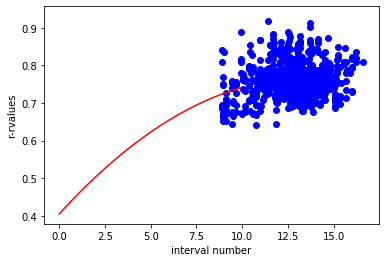

In [474]:
#plotting the polynomial regression
plt.scatter(train.respiratoryrate, train.rrvalues,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("interval number")
plt.ylabel("r-rvalues")

In [475]:
#getting the accuracy of our polynomial regression model
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: -25.87
